In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Exporando Base

In [ ]:
df = pd.read_csv('Obesity.csv')
df.info()
df.infer_objects()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df['Obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

# Divisão de treino e teste

In [ ]:
X = df.drop(['Obesity', 'Weight', 'Height'], axis=1)
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dados divididos: {X_train.shape[0]} treino, {X_test.shape[0]} teste.")

Dados divididos: 1688 treino, 423 teste.


# Definição das Features

In [ ]:
numeric_features = ['Age']
ordinal_features_numeric = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

ordinal_features_text = ['CAEC', 'CALC']
categories_order = [
    ['no', 'Sometimes', 'Frequently', 'Always'],  # Ordem para 'CAEC'
    ['no', 'Sometimes', 'Frequently', 'Always']   # Ordem para 'CALC'
]

nominal_features = ['Gender', 'family_history', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']

print("Listas de features numéricas, ordinais e nominais definidas.")


Listas de features numéricas, ordinais e nominais definidas.


# Criação das Pipelines de Pré-processamento

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

ordinal_text_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=categories_order,
                               handle_unknown='use_encoded_value',
                               unknown_value=-1))
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Montagem

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord_num', ordinal_num_transformer, ordinal_features_numeric),
        ('ord_text', ordinal_text_transformer, ordinal_features_text),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='passthrough'
)
print("ColumnTransformer (pré-processador) montado.")

ColumnTransformer (pré-processador) montado.


# Pipeline

In [ ]:
model = RandomForestClassifier(random_state=42,
                               n_estimators=100,
                               max_depth=10, # Restrição para evitar overfitting
                               min_samples_leaf=5) # Restrição para evitar overfitting

full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
print("Pipeline criada (Pré-processador + RandomForest).")

Pipeline criada (Pré-processador + RandomForest).


# Treinamento

In [ ]:
full_pipeline.fit(X_train, y_train)
print("Treinamento concluído!")

Treinamento concluído!


# Avaliação

In [ ]:
y_pred = full_pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Avaliação do Modelo")
print(f"Acurácia: {accuracy * 100:.2f}%")

Avaliação do Modelo
Acurácia: 78.49%


In [ ]:
print("\nRelatório de Classificação Detalhado:")
print(classification_report(y_test, y_pred))


Relatório de Classificação Detalhado:
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.88      0.84        56
      Normal_Weight       0.66      0.68      0.67        62
     Obesity_Type_I       0.82      0.79      0.81        78
    Obesity_Type_II       0.74      0.95      0.83        58
   Obesity_Type_III       0.94      1.00      0.97        63
 Overweight_Level_I       0.77      0.59      0.67        56
Overweight_Level_II       0.72      0.56      0.63        50

           accuracy                           0.78       423
          macro avg       0.78      0.78      0.77       423
       weighted avg       0.78      0.78      0.78       423



# Matrix de Confusão

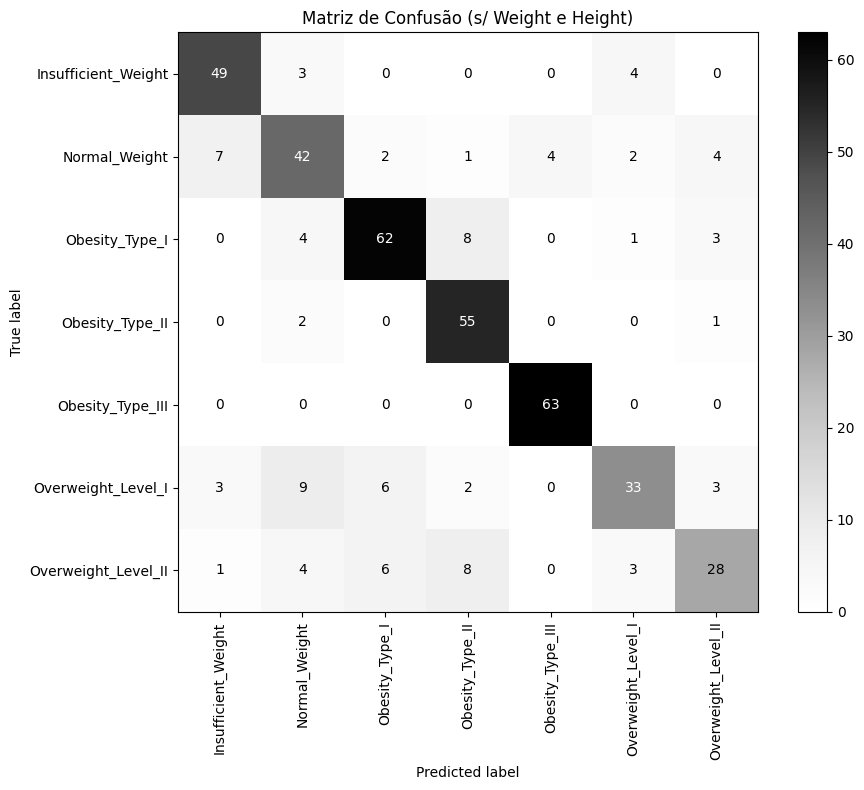

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
class_names = full_pipeline.classes_

ConfusionMatrixDisplay.from_estimator(
    full_pipeline,
    X_test,
    y_test,
    display_labels=class_names,
    ax=ax,
    xticks_rotation='vertical',
    cmap='Greys'
)
plt.title("Matriz de Confusão (s/ Weight e Height)")
plt.tight_layout()

In [ ]:
## Di, parte do streamlit
filename = 'modelo_obesidade_pipeline.pkl'
joblib.dump(full_pipeline, filename)

['modelo_obesidade_pipeline.pkl']